In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Eksplorasi Atribut Pokemon Generasi 1 - 6

## Pengenalan

Selama lebih dari 2 dekade, Pokemon sudah menemani anak-anak dari generasi millenial sampai generasi X. Dimulai dari Pokemon generasi 1 sampai dengan generasi yang paling terakhir yaitu generasi 8. Saat ini saya akan berniat untuk mengeksplorasi data dari Pokemon generasi 1 sampai 6

Data yang saya gunakan dapat diambil dari [sini](https://www.kaggle.com/abcsds/pokemon)

## Data loading

Berikut ini adalah data nya yang saya tampilkan menggunakan library Panda

In [2]:
df = pd.read_csv('Pokemon.csv')
df.iloc[0:6,:]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Data Cleaning

Dari sini kita mengetahui bahwa ada beberapa cell di kolom Type 2 yang berupa NaN. Ini akan membuat masalah di kedepannya bila kita ingin mengolah kolom tersebut. Maka kita harus mengisi data itu dengan sesuatu agar bisa diolah

In [4]:
df = df.fillna('-')
df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,-,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,-,314,44,48,65,50,64,43,1,False


### Memastikan apakah Pokemon Type di Type 1 ada semua di Type 2 dan sebaliknya

In [5]:
print(df['Type 1'].unique())
print(df['Type 2'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' '-' 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [6]:
for x in df['Type 2'].unique():
    if x not in df['Type 1'].unique():
        print(x)

-


In [7]:
for x in df['Type 1'].unique():
    if x not in df['Type 2'].unique():
        print(x)

## Eksplorasi data

### Eksplorasi data secara sederhana

Sekarang kita akan mengeksplorasi statistik data ini secara sederhana

In [8]:
df.drop(['Generation','#'], axis=1).describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


### Pokemon Type

Seperti yang kita ketahui, setiap Pokemon dapat memiliki 2 tipe yaitu Type 1 dan Type 2. Kedua tipe ini sama-sama setara. Sebagai contoh mari kita lihat Charizard

In [9]:
df.loc[df['Name']=='Charizard']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


Charizard adalah tipe Fire dan juga sekaligus Flying. Ia tidak lebih Fire atau tidak kurang Fire dibandingkan Flying-nya. Maka dari itu penting sekali untuk kita menganalisa Type 1 dan Type 2 sebagai satu kesatuan. Berikut adalah tipe-tipe Pokemon diurutkan dari yang paling banyak

In [10]:
type_1 = df['Type 1'].value_counts().sort_index()
type_2 = df['Type 2'].value_counts().sort_index().drop('-')

pokemontype = pd.DataFrame([type_1,type_2]).T

pokemontype['Type']=pokemontype['Type 1']+pokemontype['Type 2']
pokemontype.sort_values(by='Type', ascending = False)

,Type 1,Type 2,Type
Water,112,14,126
Normal,98,4,102
Flying,4,97,101
Grass,70,25,95
Psychic,57,33,90
Bug,69,3,72
Ground,32,35,67
Fire,52,12,64
Poison,28,34,62
Rock,44,14,58


### Menganalisa Pokemon terkuat menggunakan Type sebagai dasar

Sekarang saya akan membuat tabel yang berisi keterangan Pokemon untuk setiap Type mereka. Pertama-tama saya akan menggabungkan Type 1 dan Type 2 menjadi 1 variable baru yang bernama Type.

In [11]:
df['Type'] = df['Type 1'] + ',' + df['Type 2']
df.drop(['Type 1','Type 2'], axis = 1)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,1,Bulbasaur,318,45,49,49,65,65,45,1,False,"Grass,Poison"
1,2,Ivysaur,405,60,62,63,80,80,60,1,False,"Grass,Poison"
2,3,Venusaur,525,80,82,83,100,100,80,1,False,"Grass,Poison"
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False,"Grass,Poison"
4,4,Charmander,309,39,52,43,60,50,65,1,False,"Fire,-"
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,600,50,100,150,100,150,50,6,True,"Rock,Fairy"
796,719,DiancieMega Diancie,700,50,160,110,160,110,110,6,True,"Rock,Fairy"
797,720,HoopaHoopa Confined,600,80,110,60,150,130,70,6,True,"Psychic,Ghost"
798,720,HoopaHoopa Unbound,680,80,160,60,170,130,80,6,True,"Psychic,Dark"


Mari kita lihat Pokemon-Pokemon yang mempunya atribut paling tinggi di setiap Type. Saya hanya melist Pokemon-Pokemon terkuat dalam hal HP, Attack, dan Defense karena menurut saya ketiga atribut ini adalah atribut yang penting dalam sebuah JRPG. 

#### HP

In [12]:
poketypeHP = pd.DataFrame()

for tipe in df['Type 1'].unique():
    tipepokemon = df.loc[df['Type'].str.contains(tipe)]
    x = tipepokemon.loc[df['HP']==tipepokemon['HP'].max(),['Name','Type','Generation','Legendary','HP']]
    x['Strongest in'] = tipe
    poketypeHP = pd.concat([poketypeHP,x])

poketypeHP.sort_values(by = 'HP', ascending = False)

,Name,Type,Generation,Legendary,HP,Strongest in
261,Blissey,"Normal,-",2,False,255,Normal
217,Wobbuffet,"Psychic,-",2,False,190,Psychic
351,Wailord,"Water,-",3,False,170,Water
473,Drifblim,"Ghost,Flying",4,False,150,Ghost
545,GiratinaOrigin Forme,"Ghost,Dragon",4,True,150,Dragon
544,GiratinaAltered Forme,"Ghost,Dragon",4,True,150,Dragon
545,GiratinaOrigin Forme,"Ghost,Dragon",4,True,150,Ghost
544,GiratinaAltered Forme,"Ghost,Dragon",4,True,150,Ghost
473,Drifblim,"Ghost,Flying",4,False,150,Flying
321,Hariyama,"Fighting,-",3,False,144,Fighting


#### Attack

In [13]:
poketypeAttack = pd.DataFrame()

for tipe in df['Type 1'].unique():
    tipepokemon = df.loc[df['Type'].str.contains(tipe)]
    x = tipepokemon.loc[df['Attack']==tipepokemon['Attack'].max(),['Name','Type','Generation','Legendary','Attack']]
    x['Strongest in'] = tipe
    poketypeAttack = pd.concat([poketypeAttack,x])

poketypeAttack.sort_values(by = 'Attack', ascending = False)

,Name,Type,Generation,Legendary,Attack,Strongest in
163,MewtwoMega Mewtwo X,"Psychic,Fighting",1,True,190,Fighting
163,MewtwoMega Mewtwo X,"Psychic,Fighting",1,True,190,Psychic
232,HeracrossMega Heracross,"Bug,Fighting",2,False,185,Bug
424,GroudonPrimal Groudon,"Ground,Fire",3,True,180,Ground
426,RayquazaMega Rayquaza,"Dragon,Flying",3,True,180,Dragon
424,GroudonPrimal Groudon,"Ground,Fire",3,True,180,Fire
426,RayquazaMega Rayquaza,"Dragon,Flying",3,True,180,Flying
711,KyuremBlack Kyurem,"Dragon,Ice",5,True,170,Ice
454,Rampardos,"Rock,-",4,False,165,Rock
387,BanetteMega Banette,"Ghost,-",3,False,165,Ghost


#### Defense

In [14]:
poketypeDefense = pd.DataFrame()

for tipe in df['Type 1'].unique():
    tipepokemon = df.loc[df['Type'].str.contains(tipe)]
    x = tipepokemon.loc[df['Defense']==tipepokemon['Defense'].max(),['Name','Type','Generation','Legendary','Defense']]
    x['Strongest in'] = tipe
    poketypeDefense = pd.concat([poketypeDefense,x])

poketypeDefense.sort_values(by = 'Defense', ascending = False)

,Name,Type,Generation,Legendary,Defense,Strongest in
230,Shuckle,"Bug,Rock",2,False,230,Bug
333,AggronMega Aggron,"Steel,-",3,False,230,Steel
224,SteelixMega Steelix,"Steel,Ground",2,False,230,Steel
224,SteelixMega Steelix,"Steel,Ground",2,False,230,Ground
230,Shuckle,"Bug,Rock",2,False,230,Rock
789,Avalugg,"Ice,-",6,False,184,Ice
87,SlowbroMega Slowbro,"Water,Psychic",1,False,180,Water
98,Cloyster,"Water,Ice",1,False,180,Water
87,SlowbroMega Slowbro,"Water,Psychic",1,False,180,Psychic
424,GroudonPrimal Groudon,"Ground,Fire",3,True,160,Fire


#### Total

In [15]:
hp = poketypeHP[['HP','Strongest in']].drop_duplicates().set_index('Strongest in')
atta = poketypeAttack[['Attack','Strongest in']].drop_duplicates().set_index('Strongest in')
defe = poketypeDefense[['Defense','Strongest in']].drop_duplicates().set_index('Strongest in')

atributcomb = pd.concat([hp,atta,defe], axis = 1)
atributcomb

,HP,Attack,Defense
Strongest in,,,
Grass,123,132,131
Fire,115,180,160
Water,170,155,180
Bug,86,185,230
Normal,255,160,126
Poison,114,150,123
Electric,125,150,120
Ground,115,180,230
Fairy,140,160,150


#### Visualisasi

<AxesSubplot:xlabel='Pokemon Type'>

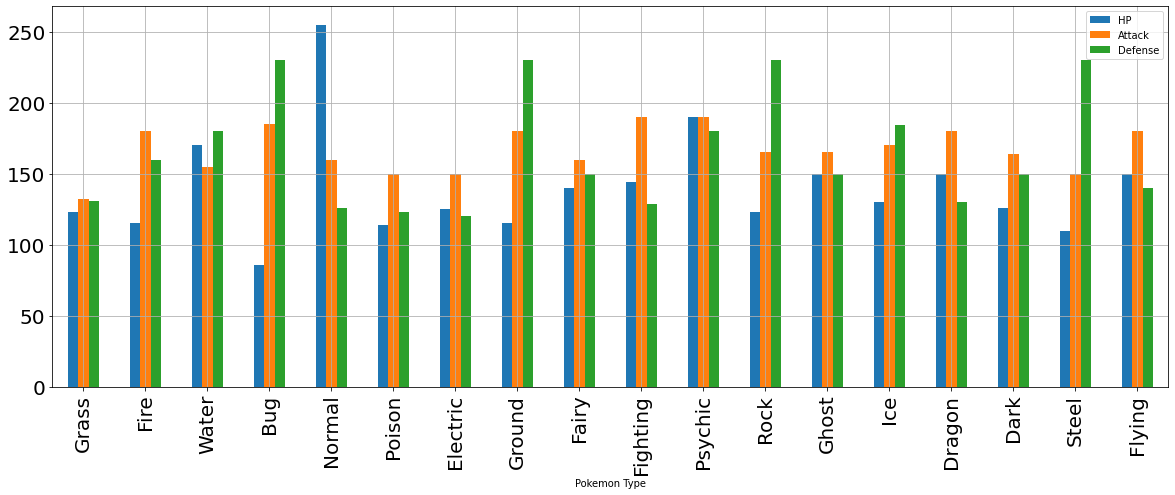

In [16]:
atributcomb.plot.bar(figsize = (20,7), fontsize = 20, xlabel = 'Pokemon Type', grid = True)

Poin-poin menarik yang bisa kita lihat dari bar chart diatas:
- HP tertinggi secara signifikan dimiliki oleh Pokemon tipe <b>Normal</b> bila dibandingkan dengan tipe lain
- Defense tertinggi dimiliki oleh tipe <b>Bug, Ground, Rock</b> dan <b>Steel</b>
- Tidak ada perbedaan yang cukup berarti pada Attack setiap tipe Pokemon
- Tipe <b>Bug</b> memiliki HP yang sangat rendah namun memiliki Defense yang cukup tinggi, hal serupa didapati di tipe <b>Ground, Rock dan Steel</b>
- <b>Poison, Electric, Fighting, Dragon</b> dan <b>Flying</b> mempunyai Attack yang cukup tinggi dibandingkan dengan HP dan Defense nya

### Rata-rata atribut di setiap Type

In [17]:
average = pd.DataFrame()
index = 0
for tipe in df['Type 1'].unique():
    tipepokemon = df.loc[df['Type'].str.contains(tipe)]
    hp = tipepokemon['HP'].mean()
    att = tipepokemon['Attack'].mean()
    defe = tipepokemon['Defense'].mean()
    dfavg = pd.DataFrame({'HP':[hp],'Attack':[att],'Defense':[defe]},index=[tipe])
    average = pd.concat([average,dfavg])
    index+=1
average

,HP,Attack,Defense
Grass,66.052632,73.463158,73.252632
Fire,70.156250,84.109375,70.093750
Water,71.023810,73.706349,74.293651
Bug,56.736111,71.763889,71.111111
Normal,76.735294,72.656863,59.607843
Poison,62.596774,70.790323,63.741935
Electric,63.200000,69.520000,66.540000
Ground,75.582090,92.671642,87.701493
Fairy,68.475000,61.575000,70.400000
Fighting,74.566038,104.660377,74.056604


#### Visualisasi

<AxesSubplot:xlabel='Pokemon Type'>

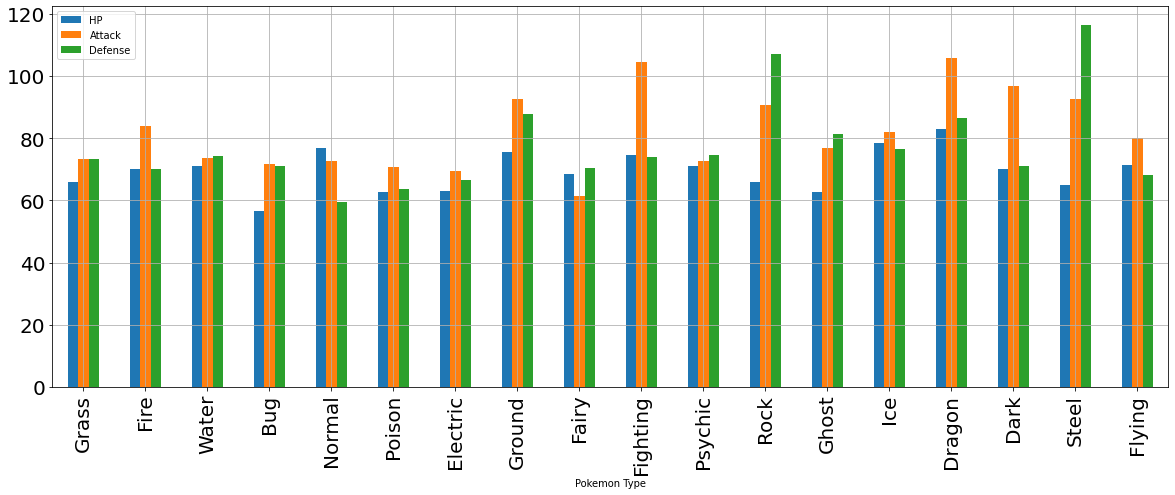

In [18]:
average.plot.bar(figsize = (20,7), fontsize = 20, xlabel = 'Pokemon Type', grid = True)

Poin-poin menarik yang bisa kita lihat dari bar chart diatas:
- Secara rata-rata tipe <b>Fighting</b> dan <b>Dragon</b> mempunyai Attack tertinggi
- Defense tertinggi secara rata-rata dimiliki oleh tipe <b>Rock</b> dan <b>Steel</b>
- Tidak ada perbedaan yang cukup berarti pada rata-rata HP setiap tipe Pokemon

## Kesimpulan

Ground, Fighting dan Steel secara keseluruhan mempunyai Pokemon yang kuat dalam hal HP, Attack dan Defense baik dalam kategori Pokemon terkuat maupun juga secara rata-rata. Bila harus memiliki tim yang terdiri dari sedikit variasi tipe-tipe nya, ketiga tipe ini sangat lah menguntungkan.

Meskipun begitu analisa ini tidak mengkonsiderasi faktor-faktor lainnya seperti tingkat kelangkaan Pokemon, jenis-jenis skill yang dimiliki, atribut-atribut lain selain 3 yang dianalisa diatas dan juga keuntungan dan kerugian setiap tipe Pokemon.